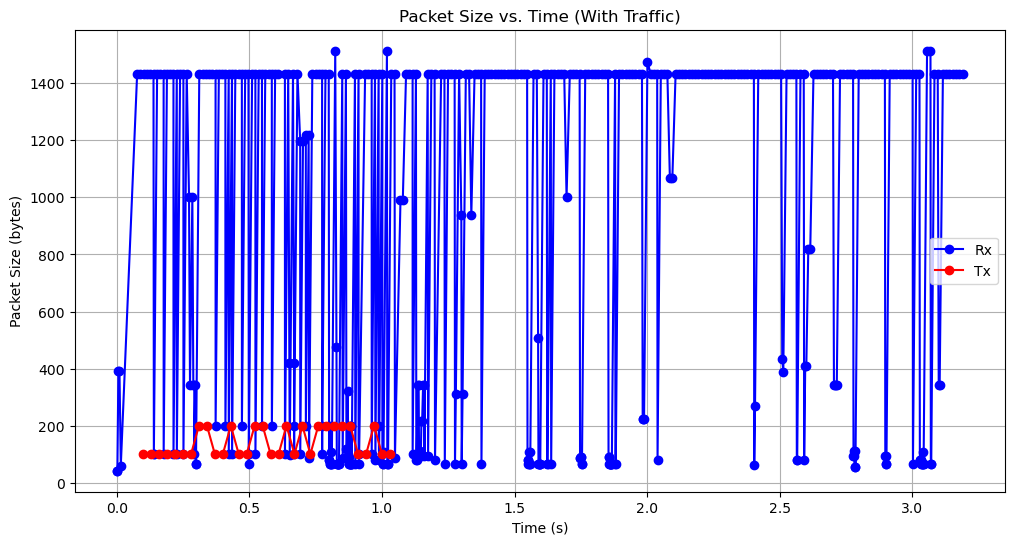

In [ ]:
import matplotlib.pyplot as plt

def read_data(filename):
    times = []
    packet_sizes = []

    with open(filename, 'r') as file:
        for line in file:
            if not line.strip():
                continue

            parts = line.strip().split()
            if len(parts) != 2:
                continue 

            try:
                time = float(parts[0])
                packet_size = int(parts[1])

                times.append(time)
                packet_sizes.append(packet_size)
            except ValueError:
                continue

    return times, packet_sizes

def plot_data(times_rx, sizes_rx, times_tx, sizes_tx, condition):
    plt.figure(figsize=(12, 6))

    plt.plot(times_rx, sizes_rx, 'b-', marker='o', label='Rx')

    plt.plot(times_tx, sizes_tx, 'r-', marker='o', label='Tx')

    plt.xlabel('Time (s)')
    plt.ylabel('Packet Size (bytes)')
    plt.title(f'Packet Size vs. Time ({condition})')
    plt.legend()
    plt.grid(True)
    plt.show()

def main():

    # Files with traffic
    rx_with_traffic_file = 'rx_traffic.txt'
    tx_with_traffic_file = 'tx_traffic.txt'

    times_rx_with_traffic, sizes_rx_with_traffic = read_data(rx_with_traffic_file)
    times_tx_with_traffic, sizes_tx_with_traffic = read_data(tx_with_traffic_file)

    plot_data(times_rx_with_traffic, sizes_rx_with_traffic, times_tx_with_traffic, sizes_tx_with_traffic, 'With Traffic')

if __name__ == '__main__':
    main()


In [ ]:

with open('rx_traffic.txt', 'r') as infile, open('output.txt', 'w') as outfile:
    for line in infile:
        parts = line.strip().split()
        if len(parts) >= 2 and parts[1] in ('100', '200'):
            outfile.write(line)


List of time differences: [0.039771, 0.029931, 0.056909000000000015, 0.08402699999999999, 0.086613, 0.089167, 0.09162099999999998, 0.08178899999999997, 0.09667500000000001, 0.095777, 0.09665599999999996, 0.08823800000000001, 0.07986800000000002, 0.11910000000000001, 0.14612600000000003, 0.310272, 0.34963599999999995, 0.364428, 0.44324399999999997, 0.43339200000000005, 0.43740799999999996, 0.464386, 0.45455399999999996, 0.47366400000000003]
Average time difference: 0.20888549999999997
Maximum time difference: 0.47366400000000003
Minimum time difference: 0.029931


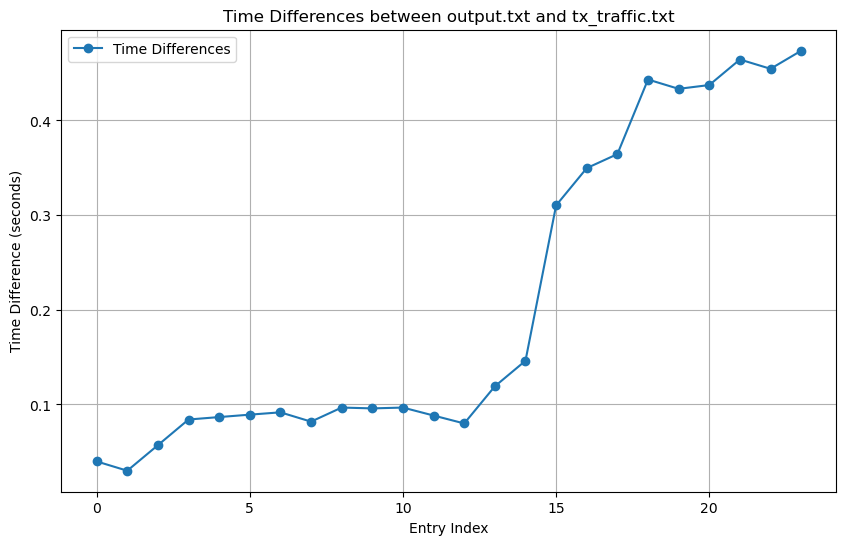

In [ ]:
import matplotlib.pyplot as plt

def load_times(file_path):
    times = []
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split()
            if parts:  
                time = float(parts[0])  
                times.append(time)
    return times

output_times = load_times('output.txt')
tx_times = load_times('tx_traffic.txt')

if len(output_times) != len(tx_times):
    print("Warning: The files have different numbers of entries.")

time_differences = [abs(output - tx) for output, tx in zip(output_times, tx_times)]

average_time_diff = sum(time_differences) / len(time_differences) if time_differences else 0
max_time_diff = max(time_differences, default=0)
min_time_diff = min(time_differences, default=0)
print("List of time differences:", time_differences)
print(f"Average time difference: {average_time_diff}")
print(f"Maximum time difference: {max_time_diff}")
print(f"Minimum time difference: {min_time_diff}")
plt.figure(figsize=(10, 6))
plt.plot(time_differences, marker='o', linestyle='-', label='Time Differences')
plt.xlabel('Entry Index')
plt.ylabel('Time Difference (seconds)')
plt.title('Time Differences between output.txt and tx_traffic.txt')
plt.legend()
plt.grid(True)
plt.show()
